In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import pickle
import re
from ast import literal_eval
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Readig the dataset having movie_id', 'title', 'cast', 'crew' features
df1= pd.read_csv(r'C:\Users\Neeraj\Desktop\Recommender\TMDB 5000 Movie Dataset\tmdb_5000_credits.csv')

In [3]:
# info/features available in df1
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [4]:
df1.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
# Readig another dataset for more feaures
df2= pd.read_csv(r'C:\Users\Neeraj\Desktop\Recommender\TMDB 5000 Movie Dataset\tmdb_5000_movies.csv')

In [6]:
# info/features available in df2
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [7]:
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [8]:
# lets combine the information in single dataframe and name it as df_merge.
# to merge the dataframe we need a common column, here the "movie_id" column  of df1 and "id" column of df2 are same.
# first we are renaming the "movie_id" column of df1 as "id", so that we can have a common column name.

df1.columns = ['id','tittle','cast','crew']

df_merge=df2.merge(df1,on='id')


In [9]:
# Now we have all the data ready for processing and visualization.

In [10]:
#lets understand the data 
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [11]:
# we have large nuumber of null values in  home page
# ovrview is not available for 3 movies.
# Realease date is not available for one movie, corresponding entries are also missing so we will drop this entry from data.
# run time is not available for 2 movies, we will try to google search and subustitute the same
# Tagline is not available for 844  movies

In [12]:
# droping the row for which we do not have the release date.
df_merge=df_merge.dropna(subset=['release_date'])
df_merge=df_merge.reset_index() 

In [13]:
# converting the realse date data type as date
df_merge['release_date'] =df_merge['release_date'].astype('M')
 
# created a new variable to store only the year of release date   
df_merge['release_date_year'] = pd.DatetimeIndex(df_merge['release_date']).year
df_merge["release_date_year"]=df_merge["release_date_year"].astype(int)

In [14]:
df_merge.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_date_year
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4.802000e+03,4800.000000,4802.000000,4802.000000,4802.000000
mean,2400.551853,2.905109e+07,57098.234902,21.496776,8.227777e+07,106.898125,6.093440,690.361724,2002.468763
std,1386.447506,4.072447e+07,88581.302370,31.818451,1.628697e+08,22.561593,1.191496,1234.674268,12.414354
min,0.000000,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000,1916.000000
25%,1200.250000,8.000000e+05,9013.750000,4.671734,0.000000e+00,94.000000,5.600000,54.000000,1999.000000
50%,2400.500000,1.500000e+07,14626.500000,12.924931,1.917498e+07,103.000000,6.200000,235.500000,2005.000000
75%,3600.750000,4.000000e+07,58589.750000,28.332017,9.291920e+07,118.000000,6.800000,737.000000,2011.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000


In [15]:
# the budget and revenue of some of the movies are zero. lets find out how many budget and revenue entries are there as zeros.
print(f"""count of entries with budget as zero is {df_merge['budget'][df_merge['budget']==0].count()}""")
print(f"""count of entries with revenue as zero is {df_merge['revenue'][df_merge['revenue']==0].count()}""")

count of entries with budget as zero is 1036
count of entries with revenue as zero is 1426


In [16]:
# checking two entries where budget is zero
df_merge[df_merge['budget']==0].head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,release_date_year
265,265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366,The Cat in the Hat,"[{""cast_id"": 1, ""character"": ""The Cat"", ""credi...","[{""credit_id"": ""52fe438d9251416c75014d95"", ""de...",2003
321,321,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,77953,"[{""id"": 6078, ""name"": ""politics""}, {""id"": 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,May The Best Loser Win.,The Campaign,5.6,578,The Campaign,"[{""cast_id"": 12, ""character"": ""Cam Brady"", ""cr...","[{""credit_id"": ""587ea5eb9251413f1b02b874"", ""de...",2012


In [17]:
# to impute the values of budget and revenue lets check the distribution of budget and revenue over time(years)

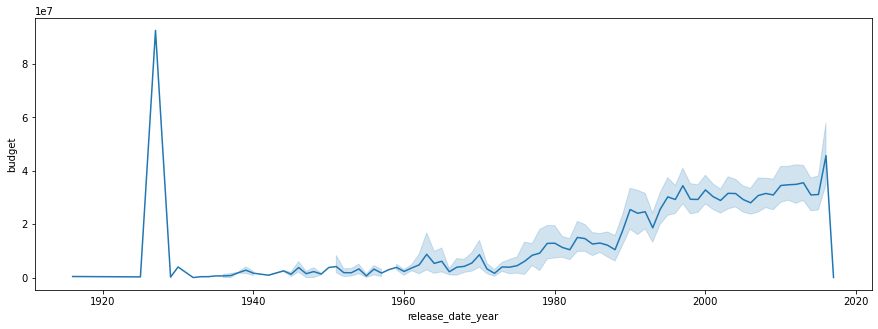

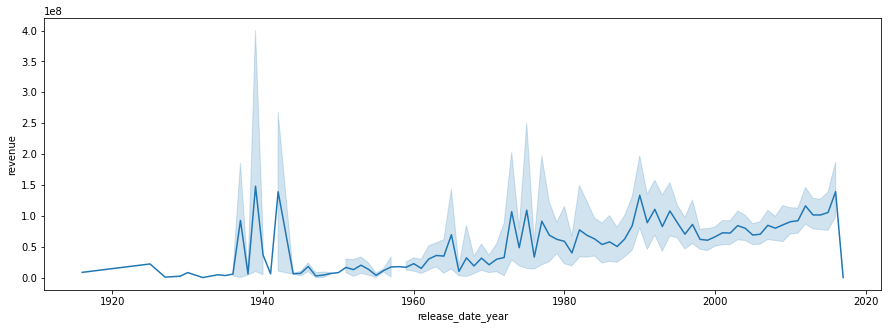

In [18]:

fig = plt.gcf()
fig.set_size_inches( 15, 5)
sns.lineplot(data=df_merge, x='release_date_year',y='budget')
plt.show()

# lets check the distribution of revenue over time(years)
fig = plt.gcf()
fig.set_size_inches( 15, 5)
sns.lineplot(data=df_merge, x='release_date_year',y='revenue')
plt.show()

In [19]:
# There are up and downs in budget trend  so we can not simply impute the mean value of budget 
# there are certain ranges in which the average budget is almost same.
# from the above graph , it seems to be a good idea to impute the mean-budget of five year range around the release year.


In [20]:
# around 1940 there is spike in revenues of movies
# after 1960 there is increase in budget range and the revenue is also increasing in this period
# there is gradual increase in budget around and after 1990.
# it will be a good idea to subustitute the mean-revenue of  five year range around the release year.

# Creating a dictonary with keys as years for which we need to impute the budget (imputation_budget_dict)

In [21]:
# there are certain movies which have budget and revenue values which seems to be incorrect like budget=1 and revenue=5.
#lets replace such values with the mean of 5 year range areound release year.

In [22]:
# lets find out the unique years for which we need to ipute the budhet values
budget_list=list(set(df_merge['release_date_year'][df_merge['budget']==0]))
budget_impute_list=[]
for  item in budget_list:
    Budget_filter=df_merge['budget'][df_merge['release_date_year']>=(item-2) ][ df_merge['release_date_year']<=(item+2)]
    budget_impute_value= Budget_filter.sum()/Budget_filter.count()
    budget_impute_list.append(int(budget_impute_value))

imputation_budget_dict=dict(zip(budget_list,budget_impute_list))
# to get the value for a specific year
#imputation_budgey_dict.get(1929)

In [23]:
# imputing the budget value from imputation_budget_dict for Zero budget values
for id_num in df_merge['id'][df_merge['budget']==0]:
    index_of_budget=df_merge[df_merge['id']==id_num].index
    budget_value=imputation_budget_dict.get(int(df_merge['release_date_year'][df_merge['id']==id_num]))
    df_merge['budget'][index_of_budget]= budget_value

In [24]:
# lets verify that there is no Zero value in budget
df_merge['budget'][df_merge['budget']==0].count()

0

In [25]:
# lets do the imputation for revenue
revenue_list_year= list(set(df_merge['release_date_year'][df_merge['revenue']==0]))
revenue_list_impute=[]  
for  item in revenue_list_year:
    revenue_filter=df_merge['revenue'][df_merge['release_date_year']>=(item-2) ][ df_merge['release_date_year']<=(item+2)]
    revenue_impute_value= revenue_filter.sum()/revenue_filter.count()
    revenue_list_impute.append(int(revenue_impute_value))

imputation_revenue_dict = dict(zip(revenue_list_year,revenue_list_impute))

# imputing the revenue value from imputation_budget_dict for Zero budget values
for id_num in df_merge['id'][df_merge['revenue']==0]:
    index_of_revenue=df_merge[df_merge['id']==id_num].index
    revenue_value=imputation_revenue_dict.get(int(df_merge['release_date_year'][df_merge['id']==id_num]))
    df_merge['revenue'][index_of_revenue]= revenue_value

In [182]:
#verifiying that we do not have any zero value in revenue
#1e+06
df_merge['revenue'].loc[df_merge['revenue']<0].count()

0

In [28]:
#Lets describe the data after imputation of budget and revenue
df_merge.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_date_year
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4.802000e+03,4800.000000,4802.000000,4802.000000,4802.000000
mean,2400.551853,3.548993e+07,57098.234902,21.496776,1.069750e+08,106.898125,6.093440,690.361724,2002.468763
std,1386.447506,3.798927e+07,88581.302370,31.818451,1.548846e+08,22.561593,1.191496,1234.674268,12.414354
min,0.000000,1.000000e+00,5.000000,0.000372,5.000000e+00,0.000000,0.000000,0.000000,1916.000000
25%,1200.250000,1.136101e+07,9013.750000,4.671734,2.718744e+07,94.000000,5.600000,54.000000,1999.000000
50%,2400.500000,3.000000e+07,14626.500000,12.924931,7.443626e+07,103.000000,6.200000,235.500000,2005.000000
75%,3600.750000,4.000000e+07,58589.750000,28.332017,1.073015e+08,118.000000,6.800000,737.000000,2011.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000


# Cast 

In [31]:
# The cast feature, 
# lets seperate the first 5 casts for each movie from cast feature. there is no hard rule to use 5 casts, we can try using 3 or any other number.
# we will have the 5 cast name in below column.
df_merge["top_5_cast_name"]=""

In [32]:
cast_list=df1["cast"].apply(literal_eval)

In [33]:
# Finding the first five actor/actress from cast 
for movie_no in range(len(cast_list)):
    Cast_top_5=[]
    for character_number in range(len(cast_list[movie_no])):
        Cast_Name=cast_list[movie_no][character_number]["name"]
        Cast_Name=re.sub('[^A-Za-z0-9]+', '', Cast_Name)
        if character_number<5:
            Cast_top_5.append(Cast_Name)
        else:
            break
            
    df_merge["top_5_cast_name"][movie_no]=Cast_top_5

df_merge["top_5_cast_name"]

0       [SamWorthington, ZoeSaldana, SigourneyWeaver, ...
1       [JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...
2       [DanielCraig, ChristophWaltz, LaSeydoux, Ralph...
3       [ChristianBale, MichaelCaine, GaryOldman, Anne...
4       [TaylorKitsch, LynnCollins, SamanthaMorton, Wi...
                              ...                        
4797                                                   []
4798    [CarlosGallardo, JaimedeHoyos, PeterMarquardt,...
4799    [EdwardBurns, KerryBish, MarshaDietlein, Caitl...
4800    [EricMabius, KristinBooth, CrystalLowe, GeoffG...
4801    [DanielHenney, ElizaCoupe, BillPaxton, AlanRuc...
Name: top_5_cast_name, Length: 4802, dtype: object

# Crew

In [34]:
# lets understand the crew feature, refer the below link to understand the crew.
#https://www.wrapbook.com/blog/film-crew-positions
# We will be usinh below key members as features from crew.
# Director ,Producer  ,Director of Photography, Original Music Composer,Visual Effects Producer
df_merge["Director"]=""
df_merge["Producer"]=""
df_merge["Director of Photography"]=""
df_merge["Original Music Composer"]=""
df_merge["Visual Effects Producer"]=""

In [35]:
#applying literal eval function on crew column of dataframe.
crew_litrl = df_merge["crew"].apply(literal_eval)


In [36]:
# Finding the Director ,producer  ,Director of Photography, Original Music Composer,Visual Effects Producer from crew 
for cr_movie_no in range(len(crew_litrl)):
    for crew_number in range(len(crew_litrl[cr_movie_no])):
        
        if crew_litrl[cr_movie_no][crew_number]["job"]=="Director":
            dir_name=crew_litrl[cr_movie_no][crew_number]['name']
            df_merge["Director"][cr_movie_no]=  re.sub('[^A-Za-z0-9]+', '', dir_name)
            
        if crew_litrl[cr_movie_no][crew_number]["job"]=="Producer":
            producer_name=crew_litrl[cr_movie_no][crew_number]["name"]
            df_merge["Producer"][cr_movie_no]=re.sub('[^A-Za-z0-9]+', '', producer_name)
            
        if crew_litrl[cr_movie_no][crew_number]["job"]=="Director of Photography":
            dir_photo_name=crew_litrl[cr_movie_no][crew_number]["name"]
            df_merge["Director of Photography"][cr_movie_no]=re.sub('[^A-Za-z0-9]+', '', dir_photo_name)
            
        if crew_litrl[cr_movie_no][crew_number]["job"]=="Original Music Composer":
            music_composer_name=crew_litrl[cr_movie_no][crew_number]["name"]
            df_merge["Original Music Composer"][cr_movie_no]= re.sub('[^A-Za-z0-9]+', '', music_composer_name)
            
        if crew_litrl[cr_movie_no][crew_number]["job"]=="Visual Effects Producer":
            visual_effect_producer_name=crew_litrl[cr_movie_no][crew_number]["name"]
            df_merge["Visual Effects Producer"][cr_movie_no]=re.sub('[^A-Za-z0-9]+', '', visual_effect_producer_name)
   

In [37]:
# lets check the feature cast and crew features we seperated.
df_merge[['top_5_cast_name','Director','Producer','Director of Photography','Original Music Composer','Visual Effects Producer']]

,top_5_cast_name,Director,Producer,Director of Photography,Original Music Composer,Visual Effects Producer
0,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",JamesCameron,JonLandau,ChilingLin,JamesHorner,CyndiOchs
1,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",GoreVerbinski,PatSandston,DariuszWolski,HansZimmer,
2,"[DanielCraig, ChristophWaltz, LaSeydoux, Ralph...",SamMendes,MichaelGWilson,HoytevanHoytema,ThomasNewman,LeslieLerman
3,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",ChristopherNolan,EmmaThomas,WallyPfister,HansZimmer,ClaudiaDehmel
4,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",AndrewStanton,LindseyCollins,DanielMindel,,DanielBarrow
...,...,...,...,...,...,...
4797,[],RobertRodriguez,CarlosGallardo,RobertRodriguez,,
4798,"[CarlosGallardo, JaimedeHoyos, PeterMarquardt,...",EdwardBurns,AaronLubin,,,
4799,"[EdwardBurns, KerryBish, MarshaDietlein, Caitl...",ScottSmith,HarveyKahn,AdamSliwinski,HalBeckett,
4800,"[EricMabius, KristinBooth, CrystalLowe, GeoffG...",DanielHsia,,,,


In [42]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    4802 non-null   int64         
 1   budget                   4802 non-null   int64         
 2   genres                   4802 non-null   object        
 3   homepage                 1712 non-null   object        
 4   id                       4802 non-null   int64         
 5   keywords                 4802 non-null   object        
 6   original_language        4802 non-null   object        
 7   original_title           4802 non-null   object        
 8   overview                 4799 non-null   object        
 9   popularity               4802 non-null   float64       
 10  production_companies     4802 non-null   object        
 11  production_countries     4802 non-null   object        
 12  release_date             4802 non-

In [43]:
df_merge.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'tittle', 'cast', 'crew',
       'release_date_year', 'top_5_cast_name', 'Director', 'Producer',
       'Director of Photography', 'Original Music Composer',
       'Visual Effects Producer'],
      dtype='object')

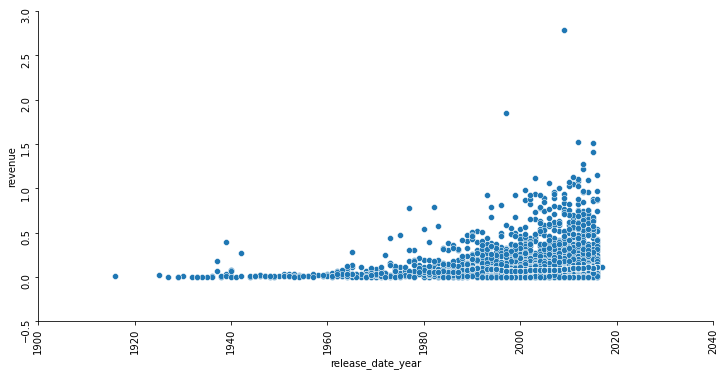

In [44]:
# lets check the distribution of revenue for movies with popularity less than 400
df_new_m=df_merge[df_merge['popularity']<400]
s=sns.relplot(
    data=df_new_m,
    x='release_date_year', y='revenue',height=5,aspect=2
)
s.set_yticklabels(rotation=90)
s.set_xticklabels(rotation=90)

# Lets understand  effect of 'popularity', 'vote_average','vote_count'  on revenue

In [45]:
data_revenue=df_merge[['id','popularity','revenue','vote_average','vote_count']]

In [46]:
data_revenue.describe()

,id,popularity,revenue,vote_average,vote_count
count,4802.000000,4802.000000,4.802000e+03,4802.000000,4802.000000
mean,57098.234902,21.496776,1.069750e+08,6.093440,690.361724
std,88581.302370,31.818451,1.548846e+08,1.191496,1234.674268
min,5.000000,0.000372,5.000000e+00,0.000000,0.000000
25%,9013.750000,4.671734,2.718744e+07,5.600000,54.000000
50%,14626.500000,12.924931,7.443626e+07,6.200000,235.500000
75%,58589.750000,28.332017,1.073015e+08,6.800000,737.000000
max,459488.000000,875.581305,2.787965e+09,10.000000,13752.000000


#  Revenue   V/S   Popularity 

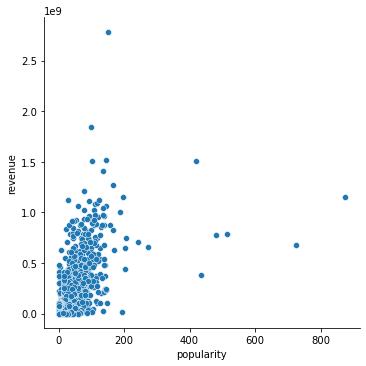

In [47]:
sns.relplot(
    data=data_revenue,
    x="popularity", y="revenue"
)

In [48]:
# the above plot suggests that there are few movies with very high popularity(>400) have higher revenues(>=five hundred million approx).
# much can not be said about the revenues of movies with populrity in range 50-200 

#  Revenue   V/S   Average_Vote 

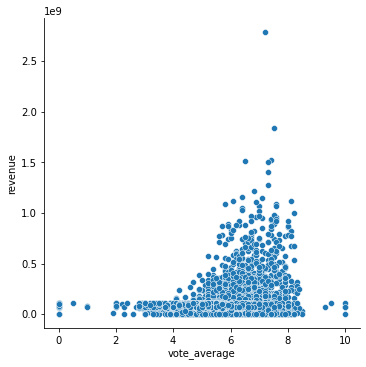

In [49]:
sns.relplot(
    data=data_revenue,
    x="vote_average", y="revenue"
)

In [50]:
# majority of the movies are rated between 4-8 range.
# only movies with average rating >=5 are having revenues >- five hundred million.
# only movies with average rating >=6 are having revenues >= one billion.
#Altough the rating greater than 5 does not guarantee the heigher revenue. 

# Revenue VS Vote count

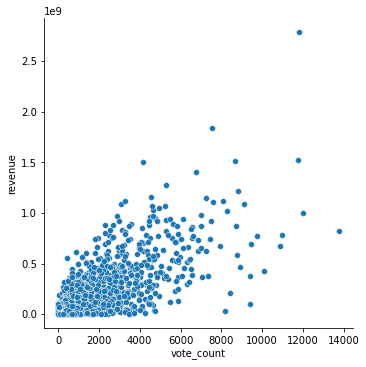

In [51]:
# checking the spread of votecount v/s revenue 
sns.relplot(
    data=data_revenue,
    x='vote_count', y="revenue"
)

# Popularity, Avg_vote, Profit V/S the Time(years)

In [53]:
df_merge['profit']=df_merge['revenue']-df_merge['budget']

<AxesSubplot:xlabel='release_date_year', ylabel='profit'>

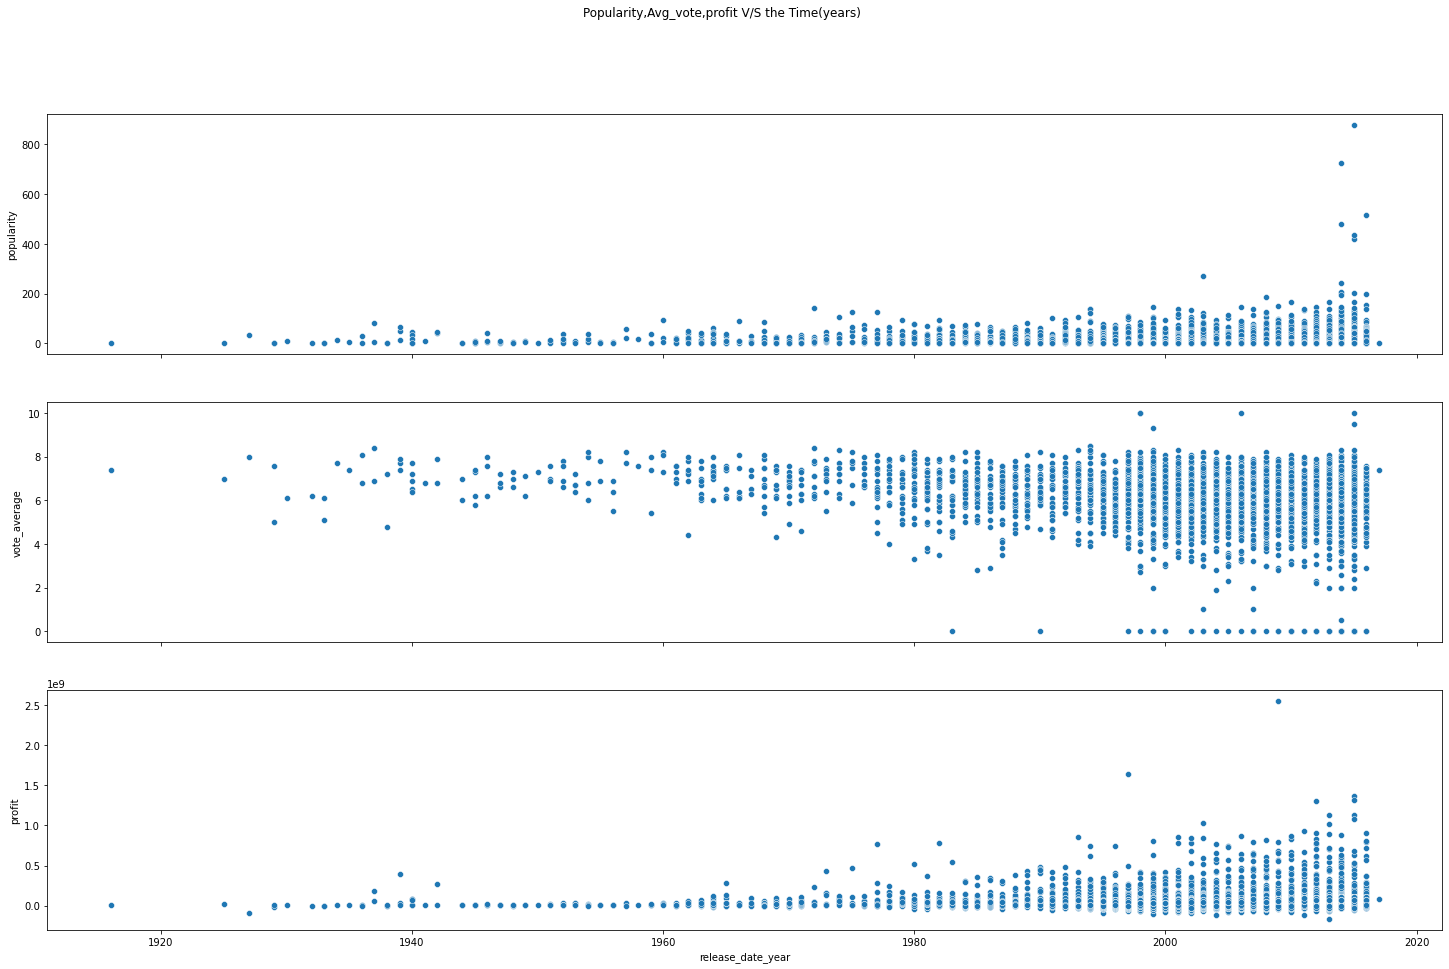

In [54]:

fig,axes=plt.subplots(3,1,figsize=(25,15), sharex=True)

fig.suptitle("Popularity,Avg_vote,profit V/S the Time(years)")


sns.scatterplot(ax=axes[0],
    data=df_merge,
    x='release_date_year', y='popularity'
)

sns.scatterplot(ax=axes[1],
    data=df_merge,
    x='release_date_year', y='vote_average'
)

sns.scatterplot(ax=axes[2],
    data=df_merge,
    x='release_date_year', y='profit'
)



In [55]:
# there are few moves with popularity >400(Seems like an outlier). 
# we will create seperate plot and try to undersatnad the popularity trend better by removing movies with populairty >400.

# in 1980 first time a movie was rated below 4(Average_rating)
# very few movies are able to cross the average rating mark of 8.
# majority of the movies are rated in range of 4-8
# after 1980 many movies are rated below 4.


#Around 1980 movies has started to make profit >= five hundred million 
# there are few movies which are able to cross profit of 1 Billion.
# we can check the features realted to movies which have generated more than 1 billion profit to predict future movies which can result in higher profits.
# we can look for similarities in those movies to filter profitable  genre , director , actor etc 



# Movies_ count VS Time (years)

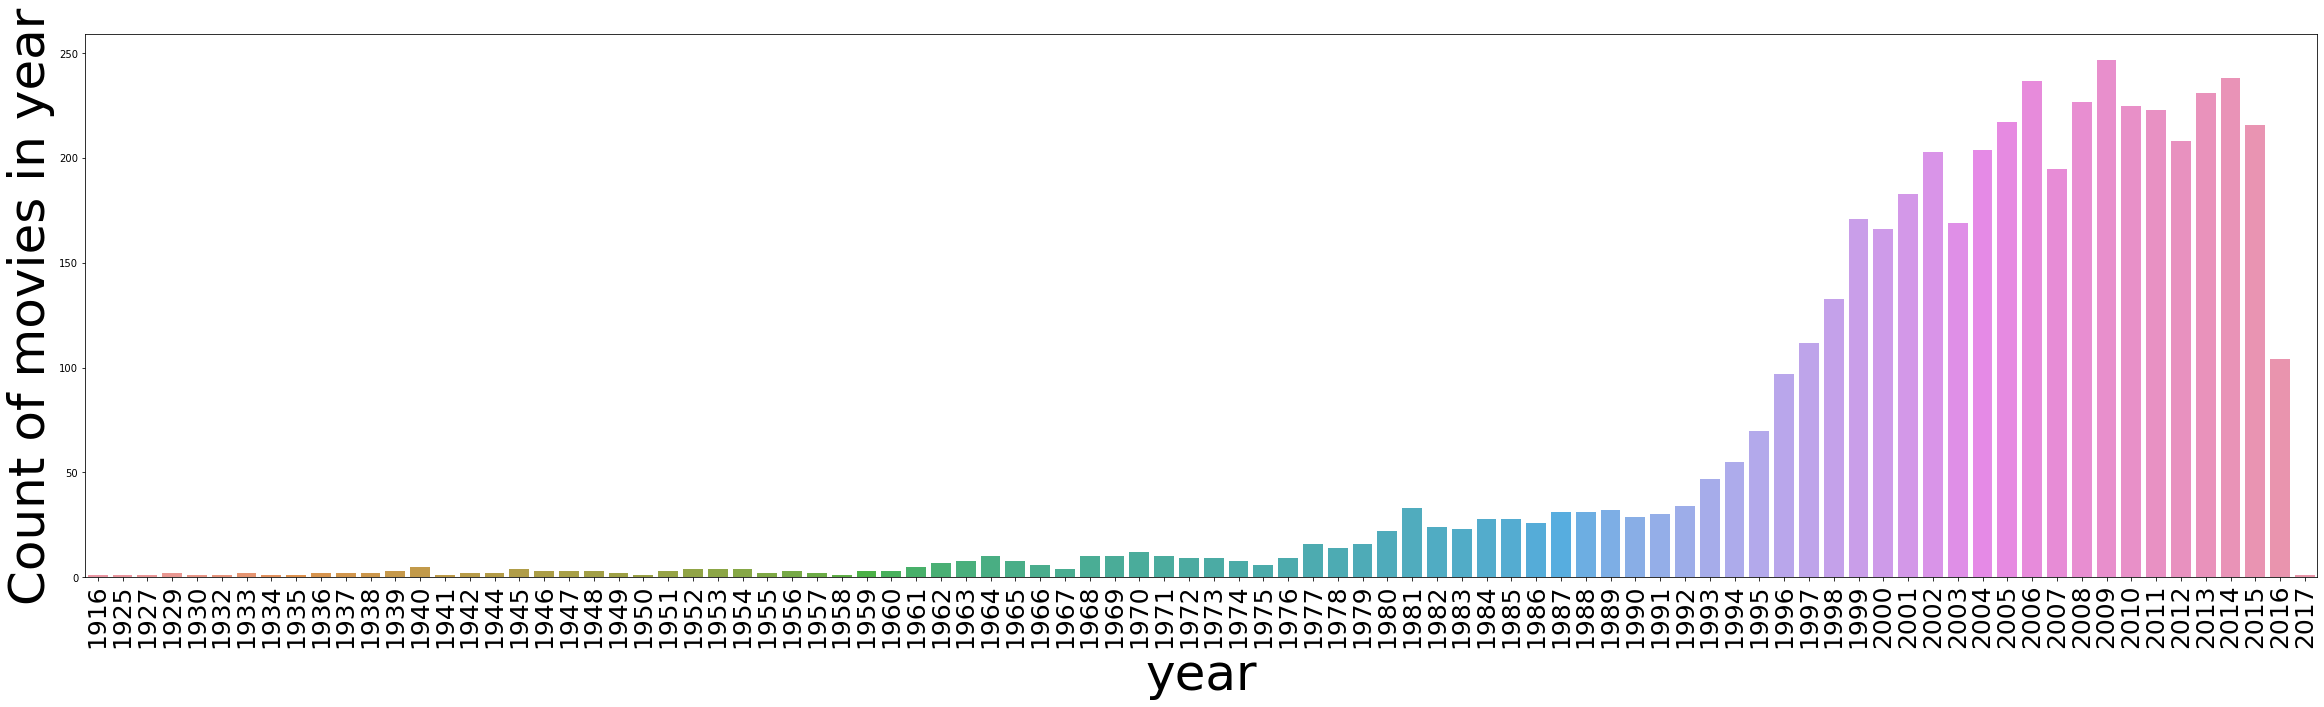

In [56]:

plt.figure(figsize = (40,10))
ax = sns.countplot(x='release_date_year', data=df_merge)
labels=ax.get_xticklabels()
ax.set_xticklabels(labels,rotation = 90,fontsize=25)

plt.xlabel("year",fontsize=50)
plt.ylabel("Count of movies in year",fontsize=50)
plt.show()


In [59]:
# there seems to be an increase in movie count per year after 1980. this could be reason for  lower ratings.
#As the User had more options after 1980 they started to be strict with the rating.
# we will check if there is any other reason for the lower ratings, like if there is any introduction of new genre which users were rating low .

#After 1992, there seems  to be a tremendeous increase in movie count per year.
# And there are also more movies with lower ratigs.

# Trend of popularity(>100)  over time(years),

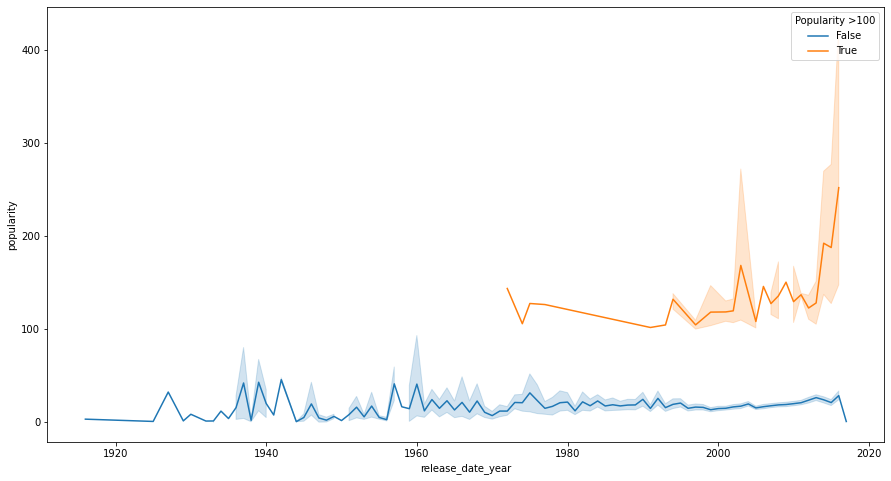

In [57]:

# here we have removed the extremly popular movies(with popularity > 400), 6 in number.
plt.figure(figsize=(15,8))
sns.lineplot(
    data=df_merge,
    x='release_date_year', y='popularity',hue=df_merge['popularity']>=100
)
plt.legend(title="Popularity >100")
plt.show()

In [58]:
# most of the movies are not able to cross the popularity mark of 100.
# In 1970, first time the movies crossed the populairty above 100.

# lets understnd the effect of features on popularity

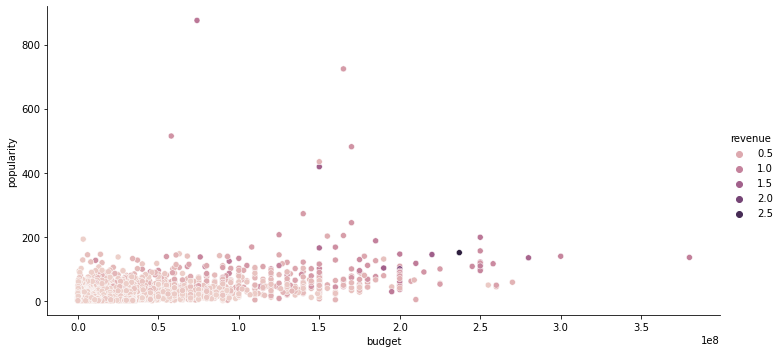

In [60]:
# checking the spread of popularity v/s budget 
sns.relplot(
    data=df_merge,
    x='budget', y='popularity',hue='revenue',height=5,aspect=10/5
)

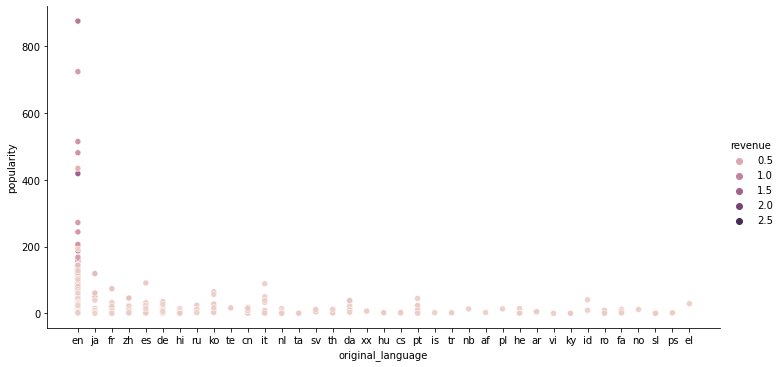

In [61]:

sns.relplot(
    data=df_merge,
    x='original_language', y='popularity',hue='revenue',height=5,aspect=10/5
)
s.set_xticklabels(rotation=90)

In [62]:
# most of the high revenues movies are in english.
# almostall of the high popularity movies(>200) are in english.

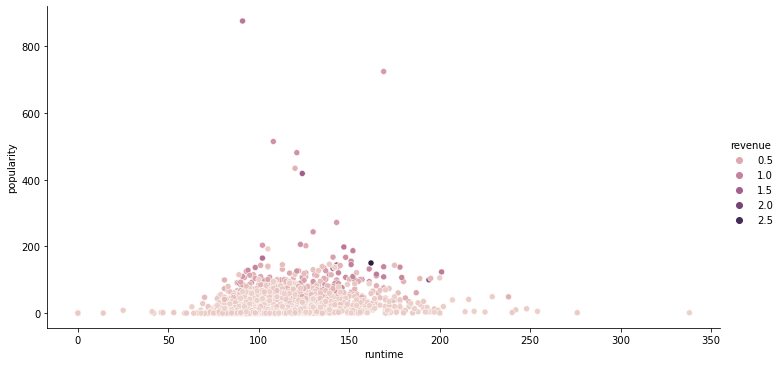

In [63]:
sns.relplot(
    data=df_merge,
    x='runtime', y='popularity',hue='revenue',height=5,aspect=10/5
)

In [64]:
# movies with run time in range of 90 -200 minutes and with popularity >=150 are resulting in high revenues.
# all high popularity movies are in runtime range of 90-150.

# Vote Average VS/ vote count and language

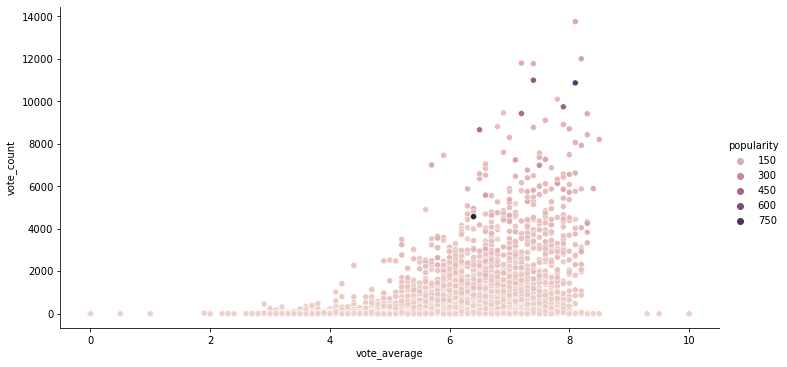

In [65]:
sns.relplot(
    data=df_merge,
    x='vote_average', y='vote_count',hue='popularity',height=5,aspect=10/5
)

In [66]:
# movies with vote count >4500 are expected to have rating in between 6-8 and high revenues.

<AxesSubplot:xlabel='original_language', ylabel='vote_average'>

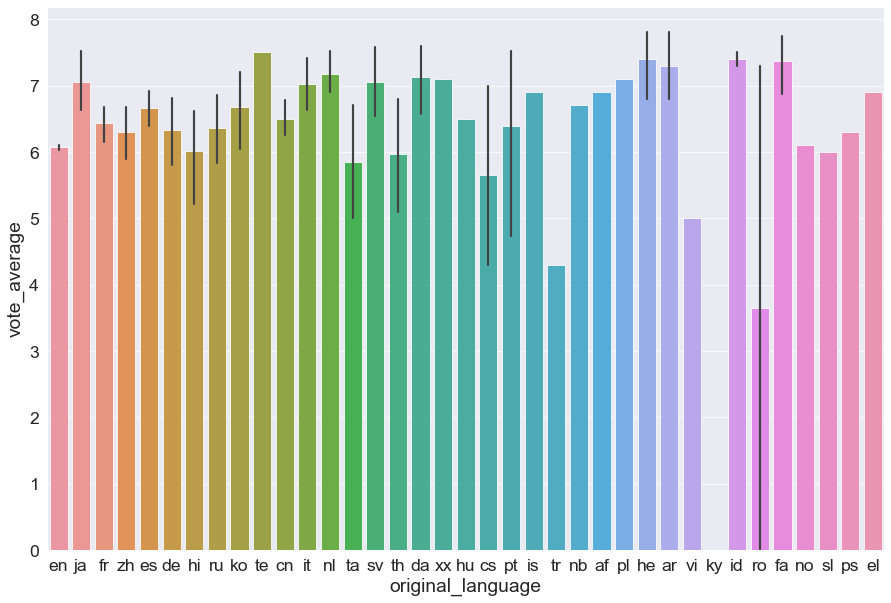

In [67]:
sns.set_palette("RdBu")
sns.set(rc={'figure.figsize':(15,10)})
sns.set_context("paper", font_scale=2)
sns.barplot(x='original_language',y="vote_average",data=df_merge)



In [68]:
# the avergae rating of english movie is 6
# mean rating for 'te' language is heighest at 7.5
# the average for te is high because there is only one movie  and is rated as 7.5
# we need to keep this factor in mind if we are planning to suggest the movies based on average ratings.
#df_merge["vote_average"][df_merge['original_language']=="en"].describe()

In [69]:
#df_merge['release_date'].value_counts().sort_index()
#df_merge[['release_date_year','vote_average','original_title','revenue']][df_merge['vote_average']==0].sort_values(by='release_date_year')

# Genre

In [70]:
# We are applying literal_eval function on genre feature and creating a list of genres available in movie and assigning the
# genre list to eval_genre .
df_merge['eval_genre']=''
new_genre= df_merge['genres'].apply(literal_eval)
#new_genre[0][0]['name']
for i in range(len(new_genre)):
    gnr_list=[]
    for j in range( len(new_genre[i])):
        gnr_temp=new_genre[i][j]['name']
        gnr_list.append(gnr_temp)
    
    df_merge['eval_genre'][i] =   gnr_list  
    

In [183]:
df_merge['eval_genre']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4797                        [Action, Crime, Thriller]
4798                                [Comedy, Romance]
4799               [Comedy, Drama, Romance, TV Movie]
4800                                               []
4801                                    [Documentary]
Name: eval_genre, Length: 4802, dtype: object

# We have processed the features and now we will build our recommender system.


# # Demographic Filtering 

In [71]:
# we can define the first recommendation based on popularity and average ratings
# lets check what if we only use the populairty to give recommendations.
# Use populairty we can define a top line of trending movies.

In [72]:
df_merge.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'tittle', 'cast', 'crew',
       'release_date_year', 'top_5_cast_name', 'Director', 'Producer',
       'Director of Photography', 'Original Music Composer',
       'Visual Effects Producer', 'profit', 'eval_genre'],
      dtype='object')

In [73]:
rcmn_popularity=df_merge[['id','original_title','popularity']].sort_values(by='popularity',ascending=False)

In [74]:
# lets check the top 10 movie recommended based on popularity
rcmn_popularity[0:10]

,id,original_title,popularity
546,211672,Minions,875.581305
95,157336,Interstellar,724.247784
788,293660,Deadpool,514.569956
94,118340,Guardians of the Galaxy,481.098624
127,76341,Mad Max: Fury Road,434.278564
28,135397,Jurassic World,418.708552
199,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889
82,119450,Dawn of the Planet of the Apes,243.791743
200,131631,The Hunger Games: Mockingjay - Part 1,206.227151
88,177572,Big Hero 6,203.734590


In [75]:
movie_popularity=list(rcmn_popularity['original_title'][0:10])

In [76]:
# what if we use average votes to recommend the movies.
#lets check the highly rated movies below
rcmn_average_vote= df_merge[['id','original_title','vote_average','vote_count']].sort_values(by='vote_average',ascending=False)

In [77]:
rcmn_average_vote[0:10]

,id,original_title,vote_average,vote_count
3519,89861,Stiff Upper Lips,10.0,1
4247,361505,Me You and Five Bucks,10.0,2
4045,78373,"Dancer, Texas Pop. 81",10.0,1
4661,40963,Little Big Top,10.0,1
3992,346081,Sardaarji,9.5,2
2386,69848,One Man's Hero,9.3,2
2970,88641,There Goes My Baby,8.5,2
1881,278,The Shawshank Redemption,8.5,8205
2796,43867,The Prisoner of Zenda,8.4,11
3337,238,The Godfather,8.4,5893


In [78]:
# imporatant point here to note that the high voted movies have low vote count.
# Movie "Stiff Upper Lips" was rated as 10 but by only one user.
# there are movies in data which are rated below 10 however the vote count for those movies are much heigher.
# we need to take in account the vote count as well when we are planning to recommend using vote_average ratings.

In [79]:
# lets take the product of vote average and vote count as the feature.
# the problem here could be, ther can be some movies for which vote count is high but the rating is low,
# The product of above case will be heigher than those movie whose rating is higher but the vote count is okay but not much high
# to overcome this we will only suggest movies for which the product is high but the average vote is greater than or equals to 6 6.
rcmn_product_avg6 = df_merge[['id','original_title','vote_average','vote_count']] [df_merge['vote_average']>=6]
rcmn_product_avg6=rcmn_product_avg6.reset_index()

In [80]:
rcmn_product_avg6['product_feature']=rcmn_product_avg6 ['vote_average'] * rcmn_product_avg6 ['vote_count']  

In [81]:
rcmn_product_avg6=rcmn_product_avg6.sort_values(by='product_feature', ascending= False)

In [82]:
# lets check the top 10 recmmendation using this product feature
rcmn_product_avg6[0:10]

,index,id,original_title,vote_average,vote_count,product_feature
69,96,27205,Inception,8.1,13752,111391.2
49,65,155,The Dark Knight,8.2,12002,98416.4
68,95,157336,Interstellar,8.1,10867,88022.7
12,16,24428,The Avengers,7.4,11776,87142.4
0,0,19995,Avatar,7.2,11800,84960.0
497,788,293660,Deadpool,7.4,10995,81363.0
200,287,68718,Django Unchained,7.8,10099,78772.2
428,662,550,Fight Club,8.3,9413,78127.9
67,94,118340,Guardians of the Galaxy,7.9,9742,76961.8
407,634,603,The Matrix,7.9,8907,70365.3


In [83]:
movie_product_feature= list(rcmn_product_avg6['original_title'][0:10])

In [84]:
#Let see how many movies are common in both of ourr basic recommendations
intersection_set = set. intersection(set(movie_popularity), set(movie_product_feature))

In [85]:
#intersection top 10 movies
intersection_set

{'Deadpool', 'Guardians of the Galaxy', 'Interstellar'}

In [86]:
# we can define two lists
# 1. Trending- based on poupularity 
# 2- Top picks- based on product feature and (make sure to remove the intersection movies from one of the lists.
# this can be our simple recommender and will be able to serve a large number of audience.
# we will try to build more personalized recommendations later in this notebook.


In [142]:
# we will recommend top pics based on the average rating and vote counts. 
#We will skip recommending movie from this list in top picks  if the movie is already suggested in trending based on popularity.



In [149]:
# List of top rated movies which are not present in top 10 popular movies
Top_picks_intersect_popular = list(set(movie_product_feature).difference(intersection_set))
movies_count_to_add=10-len(Top_picks_intersect_popular)

In [156]:
# top 10 movies tat we will recommend based on average rating(product_feature).
Top_picks = Top_picks_intersect_popular + list(rcmn_product_avg6['original_title'] [10:(10+movies_count_to_add)])

['Inception',
 'Avatar',
 'Fight Club',
 'Django Unchained',
 'The Dark Knight',
 'The Avengers',
 'The Matrix',
 'Pulp Fiction',
 'The Shawshank Redemption',
 'The Lord of the Rings: The Fellowship of the Ring']

# Content based filtering


In [87]:
df_merge.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'tittle', 'cast', 'crew',
       'release_date_year', 'top_5_cast_name', 'Director', 'Producer',
       'Director of Photography', 'Original Music Composer',
       'Visual Effects Producer', 'profit', 'eval_genre'],
      dtype='object')

In [88]:
# We will use the cast(top_5_cast_name), crew(Director', 'Producer', 'Director of Photography', 'Original Music Composer','Visual Effects Producer'), 
# keywords, genres(eval_genre), overview ,tagline,

In [186]:
#df_merge.isnull().sum()

In [90]:
# filling the na values with blank
df_merge['overview']=df_merge['overview'].fillna(value="")
df_merge['tagline']=df_merge['tagline'].fillna(value="")

In [91]:
# we are creating a seperate data frame for text content features
content_df=df_merge[['original_title', 
       'original_language',  'overview', 'tagline', 'top_5_cast_name', 'Director', 'Producer',
       'Director of Photography', 'Original Music Composer',
       'Visual Effects Producer', 'eval_genre']]

In [93]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   original_title           4802 non-null   object
 1   original_language        4802 non-null   object
 2   overview                 4802 non-null   object
 3   tagline                  4802 non-null   object
 4   top_5_cast_name          4802 non-null   object
 5   Director                 4802 non-null   object
 6   Producer                 4802 non-null   object
 7   Director of Photography  4802 non-null   object
 8   Original Music Composer  4802 non-null   object
 9   Visual Effects Producer  4802 non-null   object
 10  eval_genre               4802 non-null   object
dtypes: object(11)
memory usage: 412.8+ KB


In [94]:
content_df.isnull().sum()

original_title             0
original_language          0
overview                   0
tagline                    0
top_5_cast_name            0
Director                   0
Producer                   0
Director of Photography    0
Original Music Composer    0
Visual Effects Producer    0
eval_genre                 0
dtype: int64

In [95]:
content_df.isna().sum()

original_title             0
original_language          0
overview                   0
tagline                    0
top_5_cast_name            0
Director                   0
Producer                   0
Director of Photography    0
Original Music Composer    0
Visual Effects Producer    0
eval_genre                 0
dtype: int64

In [96]:
# there is no null and na values in content_df

In [97]:
content_df.head(2)

,original_title,original_language,overview,tagline,top_5_cast_name,Director,Producer,Director of Photography,Original Music Composer,Visual Effects Producer,eval_genre
0,Avatar,en,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",JamesCameron,JonLandau,ChilingLin,JamesHorner,CyndiOchs,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,en,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",GoreVerbinski,PatSandston,DariuszWolski,HansZimmer,,"[Adventure, Fantasy, Action]"


In [98]:
def list_to_sring(feature):
    for i in range(len(feature)):
        item=" ".join(feature[i])
        feature[i]= item
    return feature
        


In [99]:
content_df['top_5_cast_name'] =list_to_sring(content_df['top_5_cast_name'])
content_df['eval_genre'] =list_to_sring(content_df['eval_genre'])

In [100]:
# lets remove the special characters from features  and  convert all strings to lower cases

In [101]:
def filter_special_char(feature) :
    for i in range(len(feature)):
        filtered_item=re.sub('[^A-Za-z0-9 ]+', '', feature[i]).lower()
        feature[i]=filtered_item
        
    return feature 

In [102]:
content_df['original_title']  =  filter_special_char(content_df['original_title'])

In [103]:
for col in content_df.columns:
    content_df[col] = filter_special_char(content_df[col])

In [104]:
content_df.columns

Index(['original_title', 'original_language', 'overview', 'tagline',
       'top_5_cast_name', 'Director', 'Producer', 'Director of Photography',
       'Original Music Composer', 'Visual Effects Producer', 'eval_genre'],
      dtype='object')

In [105]:
 content_df['df_composite_feature'] = content_df['original_title'] +' '+ content_df['original_language']+' '+ content_df['overview'] +' '+  content_df['tagline'] + ' '+ content_df['top_5_cast_name'] + ' '+  content_df['Director'] +' '+  content_df['Producer'] + ' '+ content_df['Director of Photography'] +' '+  content_df['Original Music Composer'] +' '+  content_df['Visual Effects Producer'] + ' '+  content_df['eval_genre']
    
    

In [106]:
 content_df['df_composite_feature'] 

0       avatar en in the 22nd century a paraplegic mar...
1       pirates of the caribbean at worlds end en capt...
2       spectre en a cryptic message from bonds past s...
3       the dark knight rises en following the death o...
4       john carter en john carter is a warweary forme...
                              ...                        
4797    el mariachi es el mariachi just wants to play ...
4798    newlyweds en a newlywed couples honeymoon is u...
4799    signed sealed delivered en signed sealed deliv...
4800    shanghai calling en when ambitious new york at...
4801    my date with drew en ever since the second gra...
Name: df_composite_feature, Length: 4802, dtype: object

In [187]:
# Defining the Movie Recommender function that will take movie name and similarity matrix 

In [188]:
def movie_recommender(movie_name,cos_sim):
    movie_index=indices[movie_name]
    #print(movie_index)
    similarity_list = list(enumerate(cos_sim[movie_index]))
    sorted_similarity_list =  sorted(similarity_list, key=lambda x: x[1], reverse=True)
    #print("Sorted similarity list",sorted_similarity_list)
    top_ten_similarity_scores=sorted_similarity_list[1:11]
    #print("Top 10 similar movies index and score",top_ten_similarity_scores)
    recomdended_movie_index= [item[0] for item in top_ten_similarity_scores]
    #print(recomdended_movie_index)
    recomended_movie_names= df2['title'].iloc[recomdended_movie_index]
    #print("Recommended movies are:",'\n' ,recomended_movie_names)
    return recomended_movie_names

# Count vectorizer to calculate the Cosine similarity

In [108]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect= CountVectorizer(stop_words='english')
count_matrix_content = count_vect.fit_transform( content_df['df_composite_feature'] )

In [109]:
# finding the content based cosine similarity 
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_content = cosine_similarity(count_matrix_content, count_matrix_content)

In [110]:
#index of movies in df_merge dataframe  using series
indices = pd.Series(df_merge.index, index=df_merge['original_title']).drop_duplicates()
#indices

In [111]:
count_recomen=movie_recommender('The Dark Knight Rises',cos_sim=cosine_sim_content)

In [112]:
# Movies Recommendation using count vectorizer for composite feature
count_recomen

65                              The Dark Knight
119                               Batman Begins
1359                                     Batman
299                              Batman Forever
3854    Batman: The Dark Knight Returns, Part 2
428                              Batman Returns
1177                                   Sin City
1196                               The Prestige
1664                              Dead Man Down
2507                                  Slow Burn
Name: title, dtype: object

#  tf-idf vectorizer to calculate the cosine similarity

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect=TfidfVectorizer(stop_words='english')
tf_idf_matrix= tf_idf_vect.fit_transform(content_df['df_composite_feature'])
tf_idf_cosine_sim_content = cosine_similarity(tf_idf_matrix, tf_idf_matrix)

In [114]:
tf_recomn= movie_recommender('The Dark Knight Rises',cos_sim=tf_idf_cosine_sim_content)

In [115]:
# movies recommendation using tf-idf vectorizer for composite feature
tf_recomn

65                              The Dark Knight
119                               Batman Begins
3854    Batman: The Dark Knight Returns, Part 2
428                              Batman Returns
1359                                     Batman
299                              Batman Forever
1196                               The Prestige
210                              Batman & Robin
2507                                  Slow Burn
96                                    Inception
Name: title, dtype: object

# Comparison of recommendations(vectorizer technique) for  base movie     --      "The Dark Knight Rises"

In [116]:
# commonly recommended movies by both methods
recom_intersection_set = set. intersection(set(count_recomen), set(tf_recomn))
recom_intersection_set

{'Batman',
 'Batman Begins',
 'Batman Forever',
 'Batman Returns',
 'Batman: The Dark Knight Returns, Part 2',
 'Slow Burn',
 'The Dark Knight',
 'The Prestige'}

In [117]:
# movies which are differently recommended.
uncommon_element=set(count_recomen) ^ set(tf_recomn)
uncommon_element

{'Batman & Robin', 'Dead Man Down', 'Inception', 'Sin City'}

In [118]:
# both the approaches are giving 8 common recommendations for given movie.
# There are 4 uncommon movies, they can make difference in customer experience.
# We can setup an A-B testing  to check which vectorizer method is giving better customer experience.

# Recommendation Based on user ratings (SVD)

In [121]:
# loading the user rating data
ratings = pd.read_csv(r'C:\Users\Neeraj\Desktop\Recommender\The Movies Dataset\ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [122]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [123]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [124]:
# importing the Surprise for SVD
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()

In [128]:
#Note that in this dataset movies are rated on a scale of 5 unlike the earlier one.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
#data.split(n_folds=5)

In [129]:
svd = SVD()
#evaluate(svd, data, measures=['RMSE', 'MAE'])
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9015  0.8982  0.8971  0.8928  0.8963  0.8972  0.0028  
MAE (testset)     0.6932  0.6947  0.6917  0.6874  0.6888  0.6912  0.0027  
Fit time          17.51   19.03   20.71   20.26   18.93   19.29   1.12    
Test time         0.59    0.90    0.80    0.56    1.04    0.78    0.18    


{'test_rmse': array([0.90146111, 0.89816205, 0.897142  , 0.89276977, 0.89631818]),
 'test_mae': array([0.69320809, 0.69473062, 0.69172564, 0.68739578, 0.68877864]),
 'fit_time': (17.512223482131958,
  19.028289318084717,
  20.70625877380371,
  20.258532524108887,
  18.925341606140137),
 'test_time': (0.5856380462646484,
  0.896449089050293,
  0.7995059490203857,
  0.5646517276763916,
  1.0393621921539307)}

In [130]:
#We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case.
#Let us now train on our dataset and arrive at predictions.
trainset = data.build_full_trainset()
svd.fit(trainset)

In [132]:
# predict the rating that user 2 will give to movie(movie_id=223)
svd_movies= svd.predict(2, 223, 3)
svd_movies

Prediction(uid=2, iid=223, r_ui=3, est=3.426586972910546, details={'was_impossible': False})

# Flask App

In [133]:
#importing flask
from flask import Flask,request,render_template,redirect,url_for

In [ ]:
#initialise the flask app
app= Flask(__name__)

@app.route('/')
def home():
    return render_template ('Simple_template.html', Movies_popularity=movie_popularity, top_picks=Top_picks)
    #return (f""" Trending Movies {popularity}""")

# here we are passing the template with input form to get the movie name for which we have to give recommendations
# For a existing user we can take the movies name which he rated high or watched last(depends on the use case)
@app.route('/recom')   
def recommend():
    return render_template ('Simple_Search.html')

# here we will pass the recomendation based on content of movie on same page.
@app.route('/recom', methods=['POST'])
def my_form_post():
    text = request.form['text']
    Recommendations = movie_recommender(text,cos_sim=tf_idf_cosine_sim_content)
    return render_template ('Simple_recomend.html',Movies_recommend=Recommendations)

    
if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
